In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import glob
import tools21cm as t2c
import cmasher as cmr
plt.rcParams['font.size'] = 12
save = False
plt.rcParams.update({"text.usetex": True,'font.family': 'serif','font.size':10})

In [2]:
zc = 63
N = 128
boxsize = 14 # kpc
extent = (0,boxsize,0,boxsize)

# Instructions to reproduce the plot from the paper
1. Create the directories `pyc2ray_results` and `test_results`
2. Set the desired blackbody temperature and opacity type in `parameters.yml`
3. Execute `python run_test.py`, optionally with the `--gpu` flag to use ASORA
4. Move the output in `test_results` to a subdirectory of `pyc2ray_results` (or edit the cell below)

You can then either run the original C2Ray yourself to get the reference output, or download the data [here](https://drive.proton.me/urls/0W5XJ6WXXC#QWHTxmY9qQ99)

In [3]:
# The reference files from c2ray
files_c2ray = [
    'c2ray_results/grey/xfrac3D_8.835.bin',
    'c2ray_results/Teff=5e3/xfrac3D_8.835.bin',
    'c2ray_results/Teff=5e4/xfrac3D_8.835.bin',
    'c2ray_results/Teff=1e5/xfrac3D_8.835.bin'
]
files_pyc2ray = [
    'pyc2ray_results/grey/xfrac_8.835.pkl',
    'pyc2ray_results/Teff=5e3/xfrac_8.835.pkl',
    'pyc2ray_results/Teff=5e4/xfrac_8.835.pkl',
    'pyc2ray_results/Teff=1e5/xfrac_8.835.pkl'
]

In [4]:
slices_c2ray = np.empty((4,N,N))
slices_pyc2ray = np.empty((4,N,N))
meanxfrac_c2ray = np.empty(4)
meanxfrac_pyc2ray = np.empty(4)

diff = np.zeros((4,N,N,N))

for i,f in enumerate(files_pyc2ray):
    with open(f,"rb") as f:
        x = pkl.load(f)
    slices_pyc2ray[i] = x[:,:,zc]
    meanxfrac_pyc2ray[i] = x.mean()
    diff[i] = x
for i,f in enumerate(files_c2ray):
    x = t2c.XfracFile(f).xi
    slices_c2ray[i] = x[:,:,zc]
    meanxfrac_c2ray[i] = x.mean()
    diff[i] = (diff[i] - x)/x

In [5]:
print(meanxfrac_c2ray)
print(meanxfrac_pyc2ray)

[0.09488065 0.09503048 0.09583101 0.09492813]
[0.09488056 0.0950304  0.09583087 0.09492792]


In [6]:
err = np.empty((4,N,N))
for u in range(4):
    err[u] = (slices_pyc2ray[u]-slices_c2ray[u]) / slices_c2ray[u]*100

In [7]:
vmin_x = 2e-3
vmax_x = 1
cmap_x = 'Spectral_r'

vmin_r = -0.01
vmax_r = 0.01
cmap_r = 'RdBu'

def xfracplot(x,ax):
    return ax.imshow(x,norm='log',cmap=cmap_x,vmin=vmin_x,vmax=vmax_x,extent=extent)

def residplot(err,ax):
    return ax.imshow(err,cmap=cmap_r,vmin=vmin_r,vmax=vmax_r,extent=extent)

def errhistplot(diff,ax,errmin,errmax,errbinlim = 1e-10):
    abserr = np.abs(diff).flatten()
    errbin = np.logspace(errmin,errmax,20)
    wg = 100./(N*N*N) * np.ones(N*N*N)
    ax.set_xscale('log')
    ax.set_box_aspect(1)
    ax.set_ylim(0,85)
    return ax.hist(abserr, bins=errbin,weights=wg,color='darksalmon',ec='black')

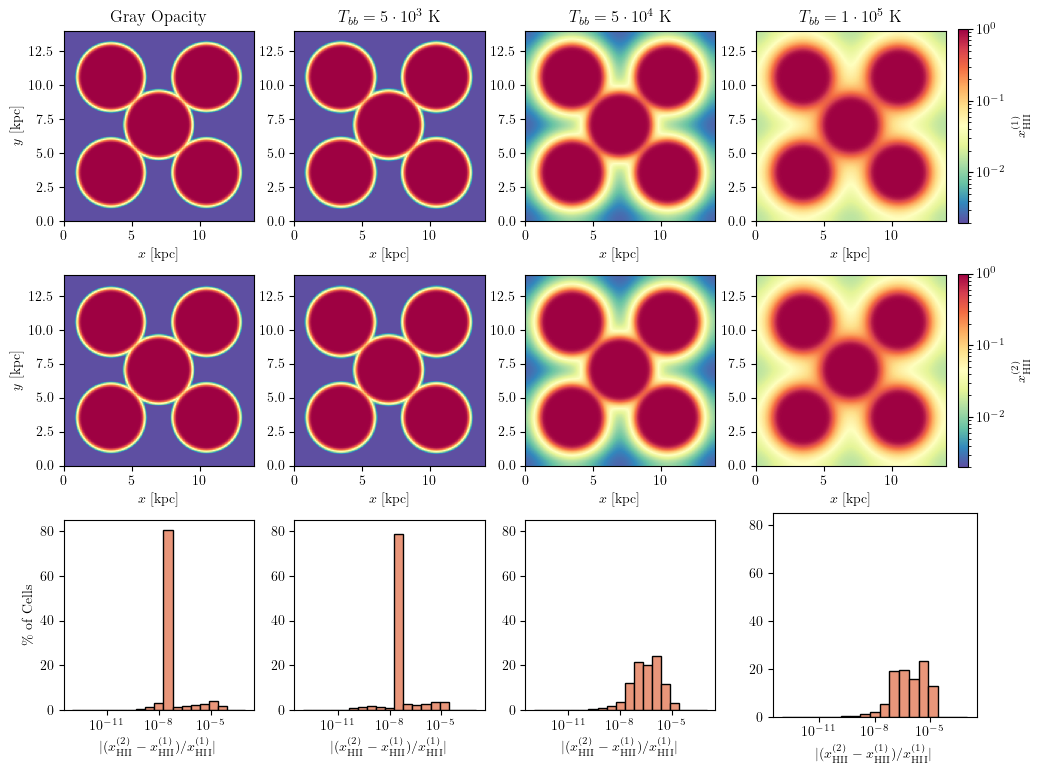

In [8]:
fig, ax = plt.subplots(3,4,figsize=(12,9),width_ratios=[1,1,1,1.25])

ax[0,0].set_xlabel('$x$ [kpc]')
ax[0,1].set_xlabel('$x$ [kpc]')
ax[0,2].set_xlabel('$x$ [kpc]')
ax[0,3].set_xlabel('$x$ [kpc]')

ax[1,0].set_xlabel('$x$ [kpc]')
ax[1,1].set_xlabel('$x$ [kpc]')
ax[1,2].set_xlabel('$x$ [kpc]')
ax[1,3].set_xlabel('$x$ [kpc]')

ax[2,0].set_xlabel("$|(x_\mathrm{{HII}}^{(2)}-x_\mathrm{{HII}}^{(1)})/x_\mathrm{{HII}}^{(1)}|$")
ax[2,1].set_xlabel("$|(x_\mathrm{{HII}}^{(2)}-x_\mathrm{{HII}}^{(1)})/x_\mathrm{{HII}}^{(1)}|$")
ax[2,2].set_xlabel("$|(x_\mathrm{{HII}}^{(2)}-x_\mathrm{{HII}}^{(1)})/x_\mathrm{{HII}}^{(1)}|$")
ax[2,3].set_xlabel("$|(x_\mathrm{{HII}}^{(2)}-x_\mathrm{{HII}}^{(1)})/x_\mathrm{{HII}}^{(1)}|$")

ax[0,0].set_ylabel('$y$ [kpc]')
ax[1,0].set_ylabel('$y$ [kpc]')
ax[2,0].set_ylabel('\% of Cells')

ax[0,0].set_title("Gray Opacity")
ax[0,1].set_title("$T_{bb} = 5\cdot 10^3$ K")
ax[0,2].set_title("$T_{bb} = 5\cdot 10^4$ K")
ax[0,3].set_title("$T_{bb} = 1\cdot 10^5$ K")

spacing = 21

im1 = xfracplot(slices_c2ray[0],ax[0,0])
xfracplot(slices_c2ray[1],ax[0,1])
xfracplot(slices_c2ray[2],ax[0,2])
xfracplot(slices_c2ray[3],ax[0,3])

im2 = xfracplot(slices_pyc2ray[0],ax[1,0])
xfracplot(slices_pyc2ray[1],ax[1,1])
xfracplot(slices_pyc2ray[2],ax[1,2])
xfracplot(slices_pyc2ray[3],ax[1,3])

errhistplot(diff[0],ax[2,0],-13,-3)
errhistplot(diff[1],ax[2,1],-13,-3)
errhistplot(diff[2],ax[2,2],-13,-3)
errhistplot(diff[3],ax[2,3],-13,-3)

cb1 = fig.colorbar(im1,ax=ax[0,3],shrink=0.95)
cb1.set_label("$x_\mathrm{{HII}}^{(1)}$")
cb2 = fig.colorbar(im2,ax=ax[1,3],shrink=0.95)
cb2.set_label("$x_\mathrm{{HII}}^{(2)}$")

In [9]:
#fig.savefig("comparison_new_nolbl.eps",bbox_inches='tight',dpi=300)
fig.savefig("test3_multisource.png",bbox_inches='tight',dpi=300)